## Problem

Flying has been the go-to mode of travel for years now; it is time-saving, affordable, and extremely convenient. According to the FAA, 2,781,971 passengers fly every day in the US, as in June 2019. Passengers reckon that flying is very safe, considering strict inspections are conducted and security measures are taken to avoid and/or mitigate any mishappenings. However, there remain a few chances of unfortunate incidents.

Imagine you have been hired by a leading airline. You are required to build Machine Learning models to anticipate and classify the severity of any airplane accident based on past incidents. With this, all airlines, even the entire aviation industry, can predict the severity of airplane accidents caused due to various factors and, correspondingly, have a plan of action to minimize the risk associated with them.

## Columns Description

#### Attributes

Accident_ID: unique id assigned to each row

Accident_Type_Code: the type of accident (factor, not numeric)

Cabin_Temperature: the last recorded temperature before the incident, measured in degrees fahrenheit

Turbulence_In_gforces: the recorded/estimated turbulence experienced during the accident

Control_Metric: an estimation of how much control the pilot had during the incident given the factors at play

Total_Safety_Complaints: number of complaints from mechanics prior to the accident

Days_Since_Inspection: how long the plane went without inspection before the incident

Safety_Score: a measure of how safe the plane was deemed to be

Violations: number of violations that the aircraft received during inspections

#### Target

Severity: a description (4 level factor) on the severity of the crash

## Solution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('C:/Users/datacore/Documents/GitHub/Case-Studies/Airplane Accidents/train.csv')
raw_data.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [4]:
raw_data.describe(include='all')

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Highly_Fatal_And_Damaging,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,NaN,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,NaN,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,NaN,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,NaN,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,NaN,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000


In [5]:
raw_data.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [6]:
data = raw_data.copy()

In [7]:
# dropping Accident_ID variable

data = data.drop(['Accident_ID'], axis=1)

In [8]:
# separating the target variable

y = data['Severity']
data = data.drop('Severity', axis=1)

In [9]:
y.value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [10]:
# label encoding the target variable

from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
lab_enc.fit(y)
y = lab_enc.transform(y)

In [11]:
np.unique(y)

array([0, 1, 2, 3], dtype=int64)

In [12]:
data.Accident_Type_Code.value_counts()

4    2057
2    1791
3    1752
7    1276
6    1215
1    1171
5     738
Name: Accident_Type_Code, dtype: int64

In [13]:
# converting Accident_Type_Code to string as it is categorical variable

data['Accident_Type_Code'] = data['Accident_Type_Code'].astype(str)

In [14]:
# creating dummies for Accident_Type_Code

data_dummies = pd.get_dummies(data['Accident_Type_Code'], prefix='Accident_Type_Code')
data_dummies.head()

,Accident_Type_Code_1,Accident_Type_Code_2,Accident_Type_Code_3,Accident_Type_Code_4,Accident_Type_Code_5,Accident_Type_Code_6,Accident_Type_Code_7
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [15]:
# dropping variable for which dummies have been created

data = data.drop(['Accident_Type_Code'], axis=1)

In [16]:
data.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric
0,49.223744,14,22,71.285324,0.272118,78.04,31335.476824,3,0.424352
1,62.465753,10,27,72.288058,0.423939,84.54,26024.711057,2,0.352350
2,63.059361,13,16,66.362808,0.322604,78.86,39269.053927,3,0.003364
3,48.082192,11,9,74.703737,0.337029,81.79,42771.499200,1,0.211728
4,26.484018,13,25,47.948952,0.541140,77.16,35509.228515,2,0.176883


In [17]:
data_num = data.copy()

In [18]:
# list of numerical variable names

l1 = list(data_num.columns)
l1

['Safety_Score',
 'Days_Since_Inspection',
 'Total_Safety_Complaints',
 'Control_Metric',
 'Turbulence_In_gforces',
 'Cabin_Temperature',
 'Max_Elevation',
 'Violations',
 'Adverse_Weather_Metric']

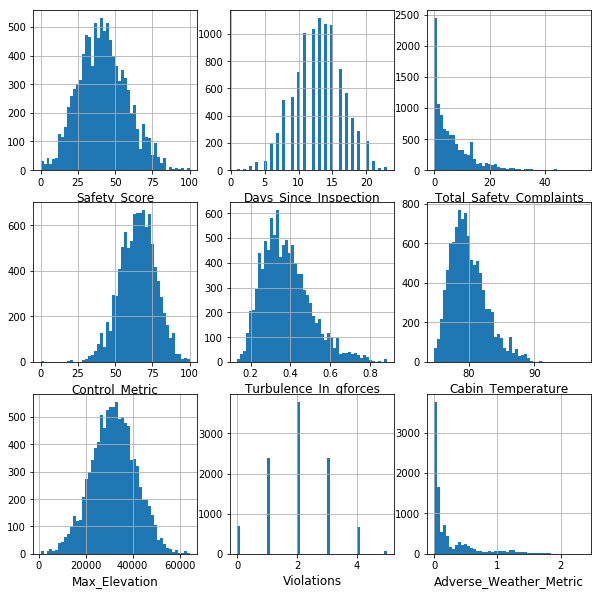

In [19]:
# plotting histograms for numerical variables

plt.figure(figsize=(10,10))
for i in range(len(l1)):
    plt.subplot(3,3,i+1)
    plt.xlabel(l1[i], fontsize=12)
    data_num[l1[i]].hist(bins=50)
plt.show()

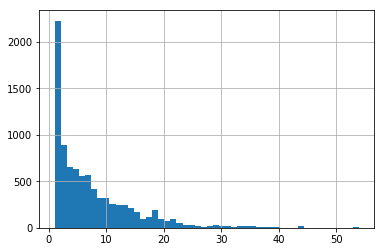

In [20]:
# checking Total_Safety_Complaints variable distribution for >0 values

data_num[data_num['Total_Safety_Complaints'] > 0]['Total_Safety_Complaints'].hist(bins=50)

In [21]:
# separating float and integer variables

float_atts = list(data_num.select_dtypes(include=['float64']).columns)
int_atts = list(data_num.select_dtypes(include=['int64']).columns)
print('Float variables: ', float_atts, '\n\nInteger variables: ', int_atts)

Float variables:  ['Safety_Score', 'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature', 'Max_Elevation', 'Adverse_Weather_Metric'] 

Integer variables:  ['Days_Since_Inspection', 'Total_Safety_Complaints', 'Violations']


In [22]:
# standardizing float variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_num[float_atts] = scaler.fit_transform(data_num[float_atts])

In [23]:
# normalizing integer variables

data_num[int_atts] = data_num[int_atts]/data_num[int_atts].max()

In [24]:
data_num.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric
0,0.455303,0.608696,0.407407,0.516733,-0.901749,-0.699134,-0.070649,0.6,0.442701
1,1.275888,0.434783,0.500000,0.601122,0.349922,1.656279,-0.633736,0.4,0.253773
2,1.312673,0.565217,0.296296,0.102462,-0.485516,-0.401990,0.770528,0.6,-0.661939
3,0.384562,0.478261,0.166667,0.804422,-0.366593,0.659758,1.141883,0.2,-0.115208
4,-0.953841,0.565217,0.462963,-1.447221,1.316177,-1.018021,0.371883,0.4,-0.206638


In [25]:
# combining numerical and categorical variables

X = pd.concat([data_num, data_dummies], axis=1)
X.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_Type_Code_1,Accident_Type_Code_2,Accident_Type_Code_3,Accident_Type_Code_4,Accident_Type_Code_5,Accident_Type_Code_6,Accident_Type_Code_7
0,0.455303,0.608696,0.407407,0.516733,-0.901749,-0.699134,-0.070649,0.6,0.442701,0,1,0,0,0,0,0
1,1.275888,0.434783,0.500000,0.601122,0.349922,1.656279,-0.633736,0.4,0.253773,0,1,0,0,0,0,0
2,1.312673,0.565217,0.296296,0.102462,-0.485516,-0.401990,0.770528,0.6,-0.661939,0,0,0,0,0,0,1
3,0.384562,0.478261,0.166667,0.804422,-0.366593,0.659758,1.141883,0.2,-0.115208,0,0,1,0,0,0,0
4,-0.953841,0.565217,0.462963,-1.447221,1.316177,-1.018021,0.371883,0.4,-0.206638,0,0,1,0,0,0,0


In [26]:
# splitting train and validation sets

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, stratify=y)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(8500, 16) (1500, 16) (8500,) (1500,)


In [27]:
# loading common classifiers

# random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# linear svm classifier
from sklearn.svm import LinearSVC
lin_svm = LinearSVC()

# rbf svm classifier
from sklearn.svm import SVC
rbf_svm = SVC()

# list of classifiers
list_cls = [rfc, lr, knn, lin_svm, rbf_svm]

In [28]:
# comparing cross-validation scores of different classifiers

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

for item in list_cls:
    cv_score = cross_val_score(item, X_train, y_train, scoring='f1_weighted')
    print(cv_score,'\n')

[0.81544938 0.82249276 0.8208378 ] 

[0.59884631 0.60630279 0.60408649] 

[0.64507588 0.64266535 0.6257503 ] 

[0.60282452 0.60315354 0.60321459] 

[0.71075653 0.70413353 0.7045132 ] 



In [29]:
# random forest classifier 

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_val)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

cnf_mt = confusion_matrix(y_val, y_pred)
acc = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')

print('Confusion Matrix: \n',cnf_mt,'\n\nAccuracy: ',100*acc,'\n\nf1 Score: ',100*f1)

Confusion Matrix: 
 [[400  30   8  19]
 [ 24 312  16  27]
 [ 11  28 208   7]
 [ 27  27   4 352]] 

Accuracy:  84.8 

f1 Score:  84.82579557088444


In [31]:
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_val)

In [32]:
cnf_mt = confusion_matrix(y_val, y_pred)
acc = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')

print('Confusion Matrix: \n',cnf_mt,'\n\nAccuracy: ',100*acc,'\n\nf1 Score: ',100*f1)

Confusion Matrix: 
 [[405  31   4  17]
 [ 22 326  11  20]
 [ 10  17 222   5]
 [ 29  25   5 351]] 

Accuracy:  86.93333333333332 

f1 Score:  86.96482067409231


In [33]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(class_weight='balanced', random_state=1)
params = {'n_estimators':[5,10,20,25], \
          'max_depth': [3,5,7,10], \
          'max_features': [3,5,'auto',None]}

grid_search = GridSearchCV(estimator=rfc, param_grid=params, cv=3, scoring='f1_weighted', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:   26.8s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 20, 25], 'max_depth': [3, 5, 7, 10], 'max_features': [3, 5, 'auto', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=1)

In [34]:
print(grid_search.best_estimator_,'\n\n',grid_search.best_score_)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False) 

 0.923130565063956


In [35]:
rfc = RandomForestClassifier(class_weight='balanced', n_estimators=25, max_depth=10, max_features=None, random_state=2)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_val)

In [36]:
cnf_mt = confusion_matrix(y_val, y_pred)
acc = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')

print('Confusion Matrix: \n',cnf_mt,'\n\nAccuracy: ',100*acc,'\n\nf1 Score: ',100*f1)

Confusion Matrix: 
 [[416   8  12  21]
 [  7 359   3  10]
 [  5   5 240   4]
 [ 11  16   2 381]] 

Accuracy:  93.06666666666666 

f1 Score:  93.06453800823434
